In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

### Perceptrons


In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int8)

per_clf = Perceptron(max_iter=1000,tol=1e-3,random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])
y_pred

array([1], dtype=int8)

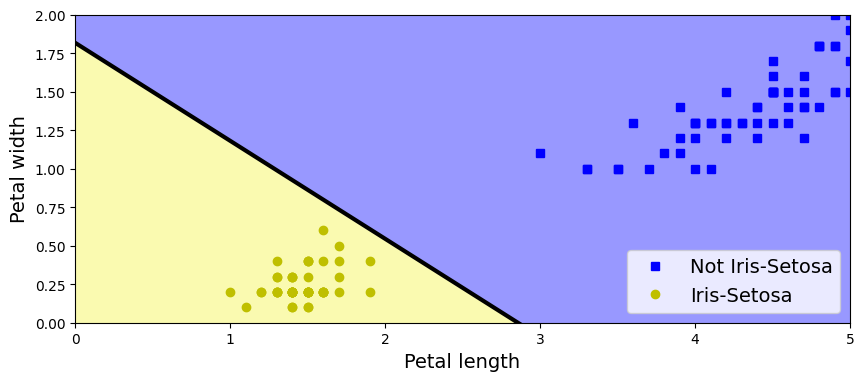

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### Activation functions


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f,z,eps = 0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

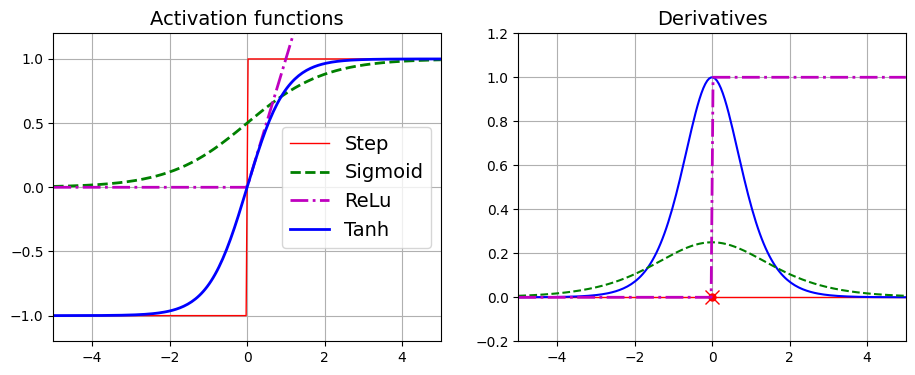

In [5]:
z = np.linspace(-5,5,200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z,np.sign(z),'r-',linewidth=1,label='Step')
plt.plot(z,sigmoid(z),'g--',linewidth=2,label='Sigmoid')
plt.plot(z,relu(z),'m-.',linewidth=2,label='ReLu')
plt.plot(z,np.tanh(z),'b-',linewidth=2,label='Tanh')
plt.grid(True)
plt.title("Activation functions", fontsize=14)
plt.legend(loc='center right',fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])


plt.subplot(122)
plt.plot(z,derivative(np.sign,z),'r-',linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z,derivative(np.tanh,z),'b-',label='Tanh')
plt.plot(z,derivative(sigmoid,z),'g--',label='Sigmoid')
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
#plt.legend(loc="center right", fontsize=14)
plt.show()

In [6]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

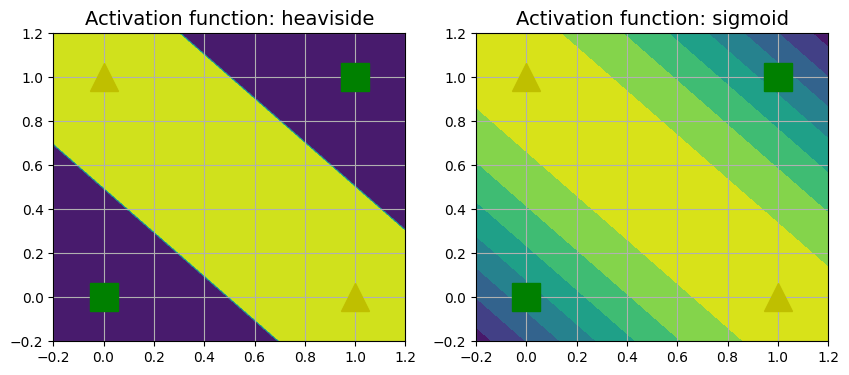

In [7]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### Building an Image Classifier


In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.__version__

'2.10.0'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape,X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [12]:
X_valid,X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

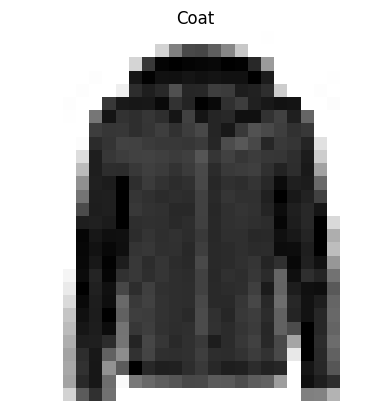

In [16]:
plt.imshow(X_train[0],cmap='binary')
plt.axis(False)
plt.title(class_names[y_train[0]])
plt.show()

In [17]:
X_valid.shape,X_test.shape

((5000, 28, 28), (10000, 28, 28))

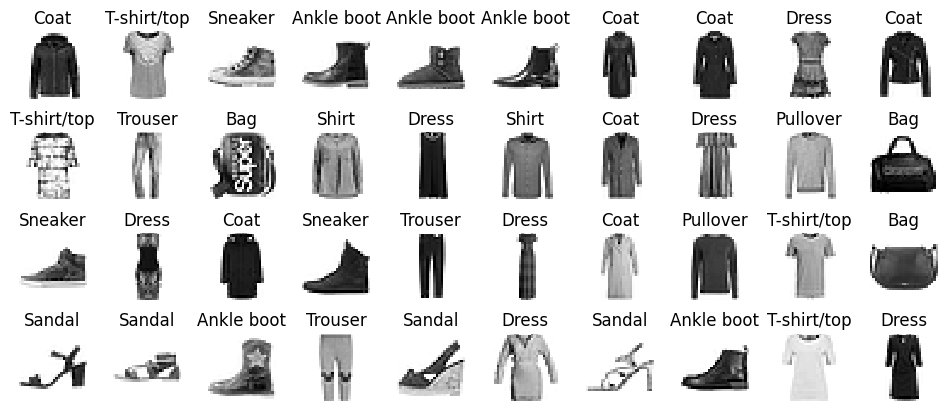

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap='binary',interpolation="nearest")
        plt.title(class_names[y_train[index]],fontsize=12)
        plt.axis(False)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the model using the Sequential API

In [19]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # flatten or keras.layers.Input(shape=[])
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer(hidden1.name) is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.04514343, -0.02895806, -0.03133908, ..., -0.06765934,
         0.05315675,  0.02325037],
       [ 0.06806067, -0.04444224,  0.00596006, ...,  0.02883991,
        -0.07349531,  0.00694969],
       [-0.01175681,  0.03919546,  0.04188053, ...,  0.04118818,
        -0.06776325, -0.00314134],
       ...,
       [ 0.06814624,  0.02804448, -0.07321715, ...,  0.03780786,
         0.02025706, -0.00771831],
       [-0.02078291, -0.06038602,  0.02325521, ..., -0.07276706,
         0.07392386, -0.06544165],
       [-0.06919415,  0.02042148, -0.01565358, ...,  0.05432154,
        -0.05028964,  0.00685423]], dtype=float32)

In [28]:
weights.shape

(784, 300)

#### Compiling the model

In [29]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

### Training and evaluating the model

In [30]:
history_ = model.fit(X_train,y_train, epochs=30,
          validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7042 - sparse_categorical_accuracy: 0.7696 - val_loss: 0.5170 - val_sparse_categorical_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4841 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.4345 - val_sparse_categorical_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4394 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.5371 - val_sparse_categorical_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4128 - sparse_categorical_accuracy: 0.8564 - val_loss: 0.3935 - val_sparse_categorical_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3945 - sparse_categorical_accuracy: 0.8619 - val_loss: 0.3786 - val_sparse_categorical_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3765 - spar

In [31]:
history_.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
history_.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

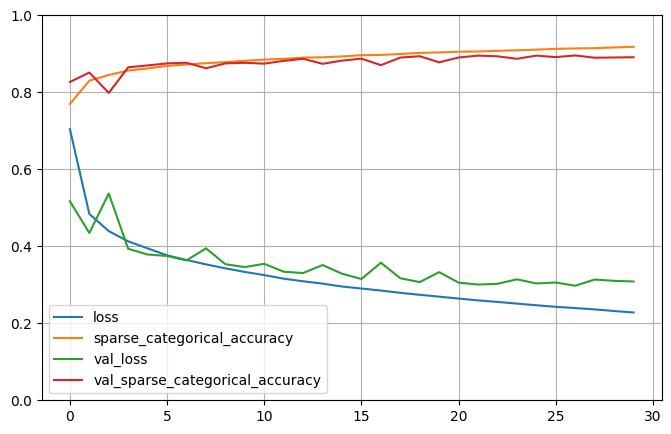

In [33]:
import pandas as pd

pd.DataFrame(history_.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3392 - sparse_categorical_accuracy: 0.8806


[0.33923330903053284, 0.8805999755859375]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 138ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 33ms/step


array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

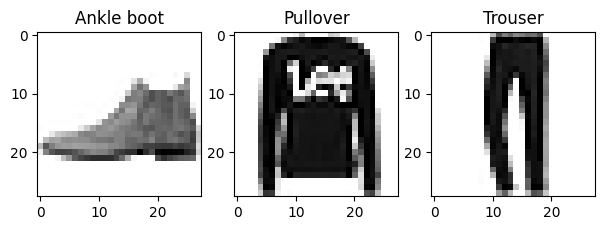

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image,cmap='binary', interpolation="nearest")
    plt.title(class_names[y_pred[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Regression MLP

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model = tf.keras.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history_ = model.fit(X_train,y_train, epochs=20,
                     validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2581 - val_loss: 1.0457
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7824 - val_loss: 0.6842
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6808 - val_loss: 0.7791
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6362 - val_loss: 0.6066
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6016 - val_loss: 0.5737
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5733 - val_loss: 0.6156
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5509 - val_loss: 0.6279
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5325 - val_loss: 0.5051
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5144 - val_loss: 0.5678
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5003 - val_loss: 0.5583

(0.0, 1.0)

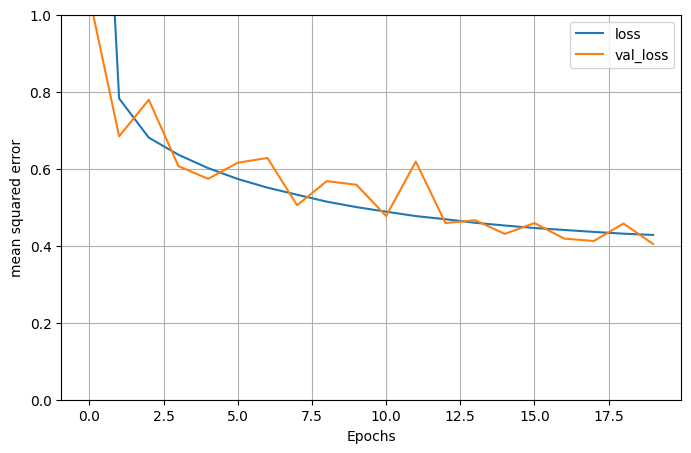

In [43]:
pd.DataFrame(history_.history).plot(figsize=(8, 5))
plt.ylabel("mean squared error")
plt.xlabel("Epochs")
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [44]:
y_pred

array([[0.41891518],
       [1.6321497 ],
       [3.4023623 ]], dtype=float32)

### Functional API


In [45]:
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) 
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs =[input_],outputs=[output])

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [48]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history_ = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0436 - val_loss: 0.9440
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7793 - val_loss: 0.7252
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6910 - val_loss: 0.6729
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6354 - val_loss: 0.5934
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5949 - val_loss: 0.5556
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5599 - val_loss: 0.5480
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5336 - val_loss: 0.5524
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5115 - val_loss: 0.4813
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4928 - val_loss: 0.4744
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4776 - val_loss: 0.4635

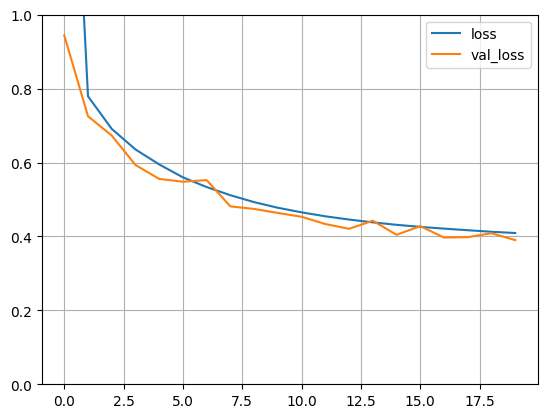

In [49]:
pd.DataFrame(history_.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
mse_test

0.40095385909080505

In [51]:
input_A = keras.layers.Input(shape=[5],name='wide input')
input_B = keras.layers.Input(shape=[6],name='deep input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='output')(concat)

model = keras.models.Model(inputs=[input_A,input_B], outputs=output)

In [52]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history_ = model.fit((X_train_A,X_train_B),y_train,epochs=20,
                    validation_data=((X_valid_A,X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A,X_test_B), y_test)
y_pred = model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.7136 - val_loss: 2.1453
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8000 - val_loss: 1.3129
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6957 - val_loss: 0.8683
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6341 - val_loss: 0.6848
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5911 - val_loss: 0.5829
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5575 - val_loss: 0.5348
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5317 - val_loss: 0.4970
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5114 - val_loss: 0.4757
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4950 - val_loss: 0.4599
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4824 - val_loss: 0.4464

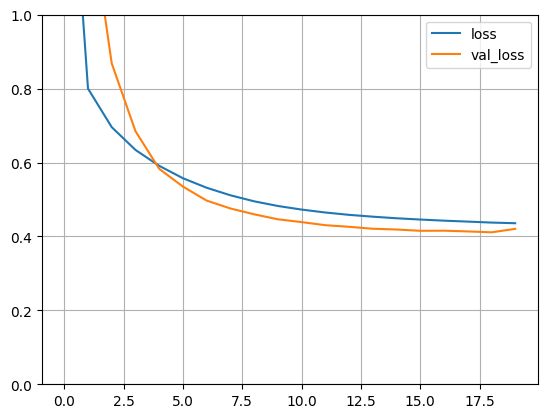

In [53]:
pd.DataFrame(history_.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
mse_test

0.43145984411239624

In [55]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A,input_B],
                          outputs=[output,aux_output])

In [56]:
model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [57]:
history_ = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A,X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.7625 - main_output_loss: 2.6523 - aux_output_loss: 3.7535 - val_loss: 2.1077 - val_main_output_loss: 1.6493 - val_aux_output_loss: 6.2331
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0556 - main_output_loss: 0.8626 - aux_output_loss: 2.7927 - val_loss: 1.3789 - val_main_output_loss: 0.8504 - val_aux_output_loss: 6.1351
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8083 - main_output_loss: 0.6595 - aux_output_loss: 2.1472 - val_loss: 1.1471 - val_main_output_loss: 0.6281 - val_aux_output_loss: 5.8185
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7190 - main_output_loss: 0.6005 - aux_output_loss: 1.7846 - val_loss: 1.0448 - val_main_output_loss: 0.5764 - val_aux_output_loss: 5.2610
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6696 - main_output_loss: 0.5689 - aux_output_loss: 1.5762 - val_loss

In [58]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 110ms/step


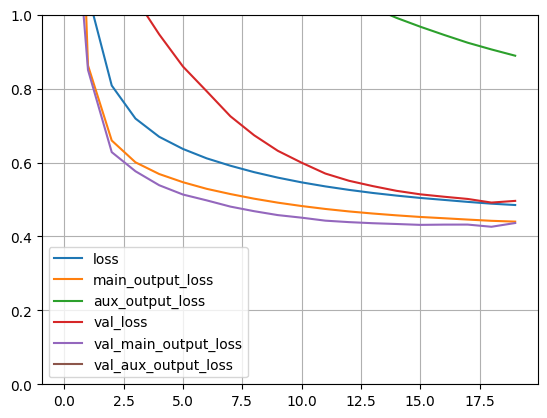

In [59]:
pd.DataFrame(history_.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### The subclassing API


In [60]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [61]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.7486 - output_1_loss: 2.6683 - output_2_loss: 3.4722 - val_loss: 2.1920 - val_output_1_loss: 2.0568 - val_output_2_loss: 3.4092
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.0716 - output_1_loss: 0.9424 - output_2_loss: 2.2340 - val_loss: 1.1036 - val_output_1_loss: 0.8950 - val_output_2_loss: 2.9810
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8713 - output_1_loss: 0.7648 - output_2_loss: 1.8292 - val_loss: 0.9354 - val_output_1_loss: 0.7163 - val_output_2_loss: 2.9070
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8014 - output_1_loss: 0.7073 - output_2_loss: 1.6486 - val_loss: 0.9093 - val_output_1_loss: 0.6778 - val_output_2_loss: 2.9928
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7636 - output_1_loss: 0.6756 - output_2_loss: 1.5559 - val_loss: 0.8885 - val_output_1_loss: 0.6582 - val_ou

### Saving and Restoring


In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.3078 - val_loss: 1.1031
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8185 - val_loss: 0.7449
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6661 - val_loss: 0.6057
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6046 - val_loss: 0.5569
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5673 - val_loss: 0.5430
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5382 - val_loss: 0.4984
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5156 - val_loss: 0.4766
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4965 - val_loss: 0.4829
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4801 - val_loss: 0.4558
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4508


In [64]:
model.save("my_keras_model.h5")

In [65]:
saved_model = keras.models.load_model("my_keras_model.h5")

In [66]:
saved_model.predict(X_new)

1/1 [==============================] - 0s 95ms/step


array([[0.9018394],
       [1.4772737],
       [3.3560543]], dtype=float32)

In [67]:
saved_model.save_weights("my_keras_weights.ckpt")

In [68]:
saved_model.load_weights("my_keras_weights.ckpt")

### Using Callbacks during Training


In [69]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_best_keras_model.h5", save_best_only=True)
history_ = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid,y_valid),
                    callbacks=[checkpoint_cb])
best_model = keras.models.load_model("my_best_keras_model.h5") #rollback best model
mse = best_model.evaluate(X_test,y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.4748 - val_loss: 1.7069
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8742 - val_loss: 0.7465
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7197 - val_loss: 0.7688
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6693 - val_loss: 0.6100
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6337 - val_loss: 0.5776
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6037 - val_loss: 0.5643
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5787 - val_loss: 0.5473
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5559 - val_loss: 0.5101
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5343 - val_loss: 0.4946
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4983


In [72]:
best_model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights=True)
history_ = best_model.fit(X_train,y_train,
                    epochs=100,
                    validation_data=(X_valid,y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])
mse_test = best_model.evaluate(X_test,y_test)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.4982 - val_loss: 0.4592
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4825 - val_loss: 0.4470
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4687 - val_loss: 0.4350
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4563 - val_loss: 0.4317
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4463 - val_loss: 0.4159
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4372 - val_loss: 0.4285
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4302 - val_loss: 0.4031
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4237 - val_loss: 0.3959
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4182 - val_loss: 0.4115
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4133 - val_lo

### Hyperparameter Tuning


In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3,input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

In [76]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\User\AppData\Local\Temp\ipykernel_4536\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [77]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.7634 - val_loss: 1.2496
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8002 - val_loss: 0.7277
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7127 - val_loss: 0.6648
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6681 - val_loss: 0.6254
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6338 - val_loss: 0.5931
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6050 - val_loss: 0.5725
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5812 - val_loss: 0.5595
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5614 - val_loss: 0.5273
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5437 - val_loss: 0.5117
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5285 - val_lo

In [79]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3621


In [80]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 72ms/step


In [81]:
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9433 - val_loss: 0.4621
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5030 - val_loss: 0.4227
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4443 - val_loss: 0.3989
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4256 - val_loss: 0.3858
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4159 - val_loss: 0.3872
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4070 - val_loss: 0.3815
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4027 - val_loss: 0.3805
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3983 - val_loss: 0.3762
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3982 - val_loss: 0.3812
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021848867880>,
                   param_distributions={'learning_rate': [0.0016834549246003507,
                                                          0.023908364455931787,
                                                          0.008731907739399207,
                                                          0.004725396149933918,
                                                          0.0006154014789262349,
                                                          0.0006153331256530192,
                                                          0.00039200217714159834,
                                                          0.016198453229362288,
                                                          0.004779156784872304,
                                                          0.00782107427...
                                                          0.0050214257366256385,
                                                          0.0005703073595961107,
                                                          0.001151888789941251,
                                                          0.0016212311563941985,
                                                          0.0024505367684280496,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.003203244812844405,
                                                          0.004591455636549436,
                                                          0.0003715541189658279, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [83]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.0058036029342010235}

In [84]:
rnd_search_cv.best_score_

-0.3060102661450704

In [85]:
rnd_search_cv.best_estimator_

In [86]:
rnd_search_cv.score(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2852


-0.28520655632019043

In [89]:
rnd_search_model = rnd_search_cv.best_estimator_.model
rnd_search_model

In [90]:
rnd_search_model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2852


0.28520655632019043

In [91]:
rnd_search_model.save("best_rnd_search_model.h5")